In [1]:
# 1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime, time
from copy import deepcopy

from classes.Job import Job, job_to_file, file_to_job
from classes.ImageNameParser import ImageNameParser
from classes.TimeSetting import TimeSetting
from utils.gui.OpenCVWindowExt import CopenCVWindowExt
from utils.nogui.undistort import undistort
from utils.nogui.correct_exposure import correct_exposure
from utils.gui.hsv_threshold_tool import hsv_tool
from utils.nogui.check_rois import check_rois

In [2]:
# 2
# Create a new job
j = Job()

# Or load an existing job
# j = file_to_job(Path("jobs/local/z1c2.json"))

In [3]:
# 3
j.zonecamera = "z1c2"
j.description = "zt23"

j.start_timestamp = datetime(2021,9,2,11,30) # year, month, day, hour, minute, second (last 3 optional)
j.end_timestamp = datetime(2021,9,2,12,31)
j.light_on_time = time(9,0) # hour, minute, second (last 2 optional)
j.light_off_time = time(21,0)

j.input_image_dir = Path(f"images/{j.zonecamera}/") # input image directory on local machine
j.output_image_dir = Path(f"out/image/{j.zonecamera}/")
j.output_csv_file = Path(f"out/csv/{j.zonecamera}_out.csv")

# Get a list of all images in the input directory with matching zone, camera, time and date 
# from above specifications.
job_image_paths = j.get_job_images(verbose=False, testing_mode=False)

Found 13 images in job


In [4]:
# 4
j.undistort = True

j.fx = 1813.0215301956628
j.cx = 1182.3714436756943
j.fy = 1816.6475234144523
j.cy = 976.6858512745583

j.k1 = -0.17123530115641178
j.k2 = 1.3367500066404934
j.k3 = -4
j.k4 = 4

K = np.array([[j.fx, 0.0, j.cx],
        [0.0, j.fy, j.cy],
        [0.0, 0.0, 1.0]]) # camera intrinsic matrix

D = np.array([j.k1, j.k2, j.k3, j.k4], dtype=np.float64) # camera distortion matrix

In [5]:
# 5
# Define a list of the various camera angles, with one example of each, for this job.
# We may need multiple camera angles if the camera or plants moved during the job.
j.camera_angle_paths = [
    Path(r"images/z1c2/z1c2--2021-09-02--11-30-07.png"),

    # for example, if the camera was bumped at 11:59, we would also include:
    # Path(r"images/z1c2/z1c2--2021-09-02--12-00-07.png"),
]

# Camera 2 map

In [6]:
# 6
# manually set genotype map
# camera 2 map
# start = datetime(2022,7,22)
# end = datetime(2022,8,5)
start = j.start_timestamp
end = j.end_timestamp
setting = {
            '0': "WT",
            '1': "lhycca1",
            '2': "WT",
            '3': "lhycca1",

            '4': "WT",
            '5': "lhycca1",
            '6': "WT",
            '7': "lhycca1",

            '8': "WT",
            '9': "lhycca1",
            '10': "WT",
            '11': "lhycca1",

            '12': "WT",
            '13': "lhycca1",
            '14': "WT",
            '15': "lhycca1",

            '16': "WT",
            '17': "lhycca1",
            '18': "WT",
            '19': "lhycca1",

            '20': "WT",
            '21': "lhycca1",
            '22': "WT",
            '23': "lhycca1",
            
            '24': "WT",
            '25': "lhycca1",
            '26': "WT",
            '27': "lhycca1",
        }
j.genotype_map.add_setting(start, end, setting)

In [ ]:
# 7 (ignore for demo)
# white spot roi
white_spot_rois = {}
for camera_angle_path in j.camera_angle_paths:
    img = cv2.imread(str(camera_angle_path))
    if j.undistort:
        img = undistort(img, K, D)
    undistorted = img
    window = CopenCVWindowExt(camera_angle_path.name)
    window.SetInitialScale(0.5)
    window.ImRead(undistorted, mode="array")
    
    key = cv2.waitKey(0)
    if key == ord("q"):
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        break
    try:
        print(camera_angle_path.name)
        print("rois len = ", len(window.rois))
        print("1st roi len = ", len(window.rois[0]))
        if len(window.rois) == 1 and len(window.rois[0]) == 4:
            white_spot_rois[camera_angle_path.name] = window.rois
        else:
            print("1 square roi still required for", camera_angle_path.name)
    except IndexError:
        continue

In [ ]:
# 8 (ignore for demo)
print(len(white_spot_rois))
print(white_spot_rois.keys())

In [ ]:
# 9 (ignore for demo, uses similar logic as other time-dependent settings)
# set white spot rois
rois = white_spot_rois
# j.white_spot_roi.add_setting(start, end, setting)

# start = datetime(2022,7,22)
# end = datetime(2022,8,5)
start = j.start_timestamp
# end = datetime(2021,11,21)
end = j.end_timestamp
setting = rois['z1c2--2023-01-01--14-00-01.png']
j.white_spot_roi.add_setting(start, end, setting)

# start = datetime(2021,11,21)
# end = j.end_timestamp
# setting = rois['z2c2--2021-11-21--12-30-01.png']
# j.white_spot_roi.add_setting(start, end, setting)

In [ ]:
# 10 (ignore for demo)
print(len(j.white_spot_roi))
print(j.white_spot_roi)
print(j.white_spot_roi.check_coverage())

Found 13 images in job
z1c2--2021-09-02--11-30-07.png 111.54842568513014
z1c2--2021-09-02--11-35-07.png 111.44113952236702
z1c2--2021-09-02--11-40-07.png 111.52337154577131
z1c2--2021-09-02--11-45-07.png 111.54376205301952
z1c2--2021-09-02--11-50-07.png 111.62995410855815
z1c2--2021-09-02--11-55-07.png 111.71107926520772
z1c2--2021-09-02--12-00-07.png 111.62907130095344
z1c2--2021-09-02--12-05-07.png 111.5989679254729
z1c2--2021-09-02--12-10-07.png 111.69988755366306
z1c2--2021-09-02--12-15-07.png 111.60117676368355
z1c2--2021-09-02--12-20-07.png 111.52714410119138
z1c2--2021-09-02--12-25-07.png 111.61735413861793
z1c2--2021-09-02--12-30-06.png 111.5889005449923


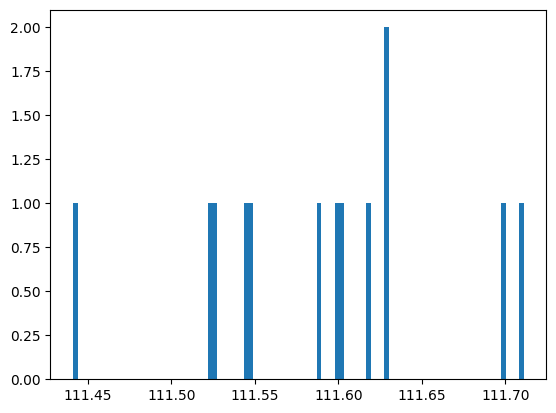

In [7]:
# 11
# create list of undistorted + exposure corrected images
exp_corrected = []
exp_corrected_paths = []
averages = []
img_paths = j.get_job_images(verbose=False, testing_mode=False)
img_paths.sort()
for img_path in img_paths:
    img_path : Path
    inp = ImageNameParser(img_path.name)
    timestamp = inp.get_timestamp()
    img = cv2.imread(str(img_path.absolute()))
    if j.undistort:
        img = undistort(img, K, D)
    undistorted = img
    white_spot_roi = j.white_spot_roi.get_setting(timestamp)
    if white_spot_roi is not None:
        exp_corrected_img = correct_exposure(undistorted, white_spot_roi)
    else:
        exp_corrected_img = undistorted
    exp_corrected.append(exp_corrected_img)
    exp_corrected_paths.append(img_path)
    print(img_path.name, np.average(exp_corrected_img))
    averages.append(np.average(exp_corrected_img))
plt.hist(averages, bins=100)
plt.show()

In [8]:
# 12
j.np_average_min = 80
j.np_average_max = 170

In [9]:
# 13
upper_hsv = [60, 255, 255]
lower_hsv = [30, 10, 125]
mask_fill_threshold = 50

In [10]:
# 14
order = "low-high"
# order = "high-low"

checked = deepcopy(exp_corrected)

if order == "high-low":
    checked.reverse()


done = False
while True:
    try:
        print(j.zonecamera)
        img = checked.pop(0)
        if np.average(img) < j.np_average_min or np.average(img) > j.np_average_max:
            continue
        lower_hsv, upper_hsv, mask_fill_threshold = hsv_tool([img], lower_hsv, upper_hsv, mask_fill_threshold, mode="array", img_scale=0.25)
    except IndexError:
        print("reached end of list")
        checked = deepcopy(exp_corrected)
    else:
        if input("done? (y/n)").upper() == "Y":
            done = True
            break
    if done:
        break
    

z1c2


HSV UPPER = [60, 255, 255]
HSV LOWER = [30, 10, 125]
MASK FILL = 50




In [11]:
# 15
print(upper_hsv)
print(lower_hsv)
print(mask_fill_threshold)

[60, 255, 255]
[30, 10, 125]
50


In [12]:
# 16
j.upper_hsv = upper_hsv
j.lower_hsv = lower_hsv
j.mask_fill_threshold = mask_fill_threshold

In [ ]:
# 17 (ignore for demo)
j.size_marker_upper_hsv = upper_hsv
j.size_marker_lower_hsv = lower_hsv
j.size_marker_fill_threshold = mask_fill_threshold

In [ ]:
# 18 (ignore for demo)
# size marker rois
size_marker_rois = {}
for camera_angle_path in j.camera_angle_paths:
    img = cv2.imread(str(camera_angle_path))
    if j.undistort:
        img = undistort(img, K, D)
    undistorted = img
    window = CopenCVWindowExt(camera_angle_path.name)
    window.SetInitialScale(1.0)
    window.ImRead(undistorted, mode="array")
    
    key = cv2.waitKey(0)
    if key == ord("q"):
        cv2.destroyAllWindows()
        break
    try:
        print(camera_angle_path.name)
        print("rois len = ", len(window.rois))
        if len(window.rois) == 1:
            size_marker_rois[camera_angle_path.name] = window.rois
        else:
            print("1 size marker roi still required for", camera_angle_path.name)
    except IndexError:
        continue

In [ ]:
# 19 (ignore for demo)
print(len(size_marker_rois))
for key in size_marker_rois.keys():
    print(key)

for key in j.plant_rois.keys():
    print(key)
# print(size_marker_rois.keys())
# print(j.plant_rois.keys())

In [ ]:
# 20 (ignore for demo)
# set size marker rois
j.size_marker_rois = TimeSetting()
rois = size_marker_rois
# j.size_marker_rois.add_setting(start, end, setting)

start = j.start_timestamp
# end = datetime(2021,11,21)
end = j.end_timestamp
setting = rois['z12c2--2021-11-21--12-30-01.png']
j.size_marker_rois.add_setting(start, end, setting)

# start = datetime(2021,11,21)
# end = j.end_timestamp
# setting = rois['z2c2--2021-11-21--12-30-01.png']
# j.size_marker_rois.add_setting(start, end, setting)


In [ ]:
# 21 (ignore for demo)
print(len(j.size_marker_rois))
print(j.size_marker_rois.check_coverage())

In [13]:
# 22
# plant rois
plant_rois = {}
for camera_angle_path in j.camera_angle_paths:
    inp = ImageNameParser(camera_angle_path.name)
    timestamp = inp.get_timestamp()
    img = cv2.imread(str(camera_angle_path))
    if j.undistort:
        img = undistort(img, K, D)
    undistorted = img
    window = CopenCVWindowExt(camera_angle_path.name)
    window.SetInitialScale(0.5)
    window.ImRead(undistorted, mode="array")
    
    key = cv2.waitKey(0)
    if key == ord("q"):
        cv2.destroyAllWindows()
        break
    try:
        print(camera_angle_path.name)
        print("rois len = ", len(window.rois))
        if len(window.rois) == len(j.genotype_map.get_setting(timestamp)):
            plant_rois[camera_angle_path.name] = window.rois
        else:
            print(f"rois len {len(window.rois)} != genotype map len {len(j.genotype_map.get_setting(timestamp))} for image", camera_angle_path.name)
    except IndexError:
        continue

z1c2--2021-09-02--11-30-07.png
rois len =  28


In [14]:
# 23
print(len(plant_rois))
print(plant_rois.keys())

1
dict_keys(['z1c2--2021-09-02--11-30-07.png'])


In [15]:
# 24
# set plant rois
rois = plant_rois

start = j.start_timestamp
end = j.end_timestamp
setting = rois['z1c2--2021-09-02--11-30-07.png']
j.plant_rois.add_setting(start, end, setting)

# start = datetime(2021,11,21)
# end = j.end_timestamp
# setting = rois['z2c2--2021-11-21--12-30-01.png']
# j.plant_rois.add_setting(start, end, setting)

In [16]:
# 25
print(len(j.plant_rois))
print(j.plant_rois.check_coverage())

1
True


In [17]:
# 26
# check camera angle rois
for camera_angle_path in j.camera_angle_paths:
    img = cv2.imread(str(camera_angle_path))
    timestamp = ImageNameParser(camera_angle_path.name).get_timestamp()
    if j.undistort:
        img = undistort(img, K, D)
    undistorted = img

    # combined_rois = j.white_spot_roi.get_setting(timestamp) + j.plant_rois.get_setting(timestamp) + j.size_marker_rois.get_setting(timestamp)
    combined_rois = j.plant_rois.get_setting(timestamp) # + j.size_marker_rois.get_setting(timestamp)
    
    img = check_rois(undistorted, combined_rois)
    window = CopenCVWindowExt(camera_angle_path.name)
    window.SetInitialScale(0.5)
    window.ImRead(img, mode="array")
    key = cv2.waitKey(0)
    if key == ord("q"):
        cv2.destroyAllWindows()

In [ ]:
# 27 (ignore for demo)
# check all rois

order = "low-high"
# order = "high-low"

checked = deepcopy(exp_corrected)
checked_paths = deepcopy(exp_corrected_paths)

if order == "high-low":
    checked.reverse()
    checked_paths.reverse()


done = False
while True:
    try:
        print(j.zonecamera)
        img = checked.pop(0)
        path = checked_paths.pop(0)
        
        if np.average(img) < j.np_average_min or np.average(img) > j.np_average_max:
            continue

        timestamp = ImageNameParser(path.name).get_timestamp()
        # combined_rois = j.white_spot_roi.get_setting(timestamp) + j.plant_rois.get_setting(timestamp) + j.size_marker_rois.get_setting(timestamp)
        # combined_rois = j.plant_rois.get_setting(timestamp) + j.size_marker_rois.get_setting(timestamp)
        combined_rois = j.plant_rois.get_setting(timestamp)
        
        img = check_rois(img, combined_rois)
        window = CopenCVWindowExt(path.name)
        window.SetInitialScale(0.5)
        window.ImRead(img, mode="array")
        key = cv2.waitKey(0)
        if key == ord("q"):
            cv2.destroyAllWindows()
    
    except IndexError:
        print("reached end of list")
        checked = deepcopy(exp_corrected)
    else:
        if input("done? (y/n)").upper() == "Y":
            done = True
            break
    if done:
        break

In [18]:
# 28
# check for missing values
print(j)
for k,v in j.__dict__.items():
    
    if v in [None, "", [], {}]:
        print("missing", k)


z1c2
missing white_spot_roi
missing size_marker_rois
missing size_marker_upper_hsv
missing size_marker_lower_hsv
missing size_marker_fill_threshold


In [21]:
# 29
# input image dir for server
zonestr = str(j.get_zone())
camerastr = str(j.get_camera())

# input image dir for my pc
j.input_image_dir = Path(f"images/{j.zonecamera}/")
j.output_image_dir = Path(f"out/image/{j.zonecamera}/")

job_to_file(j, Path(f"jobs/demo/{j.zonecamera}.json"))
print(f"saved to jobs/demo/{j.zonecamera}.json")

saved to jobs/demo/z1c2.json
